# Homework

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('bank/bank-full.csv', delimiter = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
del df['default']
del df['loan']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   contact    45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.2+ MB


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#frequent eduation

df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Secondary Most Frequent Education

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

In [10]:
df_numeric = df.copy()
df_numeric = df.drop(
    ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome', 'y'], axis=1
)
df_numeric.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df_numeric.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


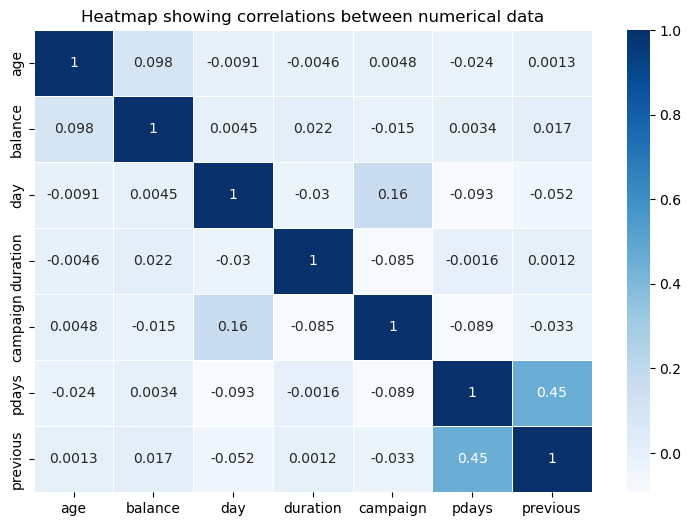

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(9, 6))
sns.heatmap(df_numeric.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [13]:
df_numeric.corr().unstack().sort_values(ascending=False)

age       age         1.000000
balance   balance     1.000000
pdays     pdays       1.000000
campaign  campaign    1.000000
day       day         1.000000
duration  duration    1.000000
previous  previous    1.000000
          pdays       0.454820
pdays     previous    0.454820
campaign  day         0.162490
day       campaign    0.162490
age       balance     0.097783
balance   age         0.097783
          duration    0.021560
duration  balance     0.021560
balance   previous    0.016674
previous  balance     0.016674
age       campaign    0.004760
campaign  age         0.004760
balance   day         0.004503
day       balance     0.004503
balance   pdays       0.003435
pdays     balance     0.003435
previous  age         0.001288
age       previous    0.001288
duration  previous    0.001203
previous  duration    0.001203
pdays     duration   -0.001565
duration  pdays      -0.001565
age       duration   -0.004648
duration  age        -0.004648
age       day        -0.009120
day     

In [14]:
## Target Encoding

In [15]:
df.y = (df.y == 'yes').astype(int)
df

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25)

In [18]:
df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [19]:
y_train = df_train['y'].values
y_test = df_test['y'].values
y_val = df_val['y'].values

In [20]:
del df_train['y']
del df_test['y']
del df_val['y']

In [21]:
df_full_train.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [22]:
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical = ['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [23]:
from sklearn.metrics import mutual_info_score, accuracy_score

In [24]:
def mutual_info_y_score(series):
    return mutual_info_score(series, df_full_train.y)
    

In [25]:
mi_scores = df_full_train[categorical].apply(mutual_info_y_score)
mi_scores.sort_values(ascending=False)[:1]

poutcome    0.029257
dtype: float64

In [26]:
## Train Logisitic Regression

from sklearn.feature_extraction import DictVectorizer

In [27]:
dv = DictVectorizer(sparse=False)

In [28]:
dict_train = df_train[numerical+categorical].to_dict(orient='records')
dict_train

[{'age': 53,
  'balance': -905,
  'day': 28,
  'duration': 213,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'job': 'services',
  'marital': 'divorced',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'unknown',
  'month': 'may',
  'poutcome': 'unknown'},
 {'age': 45,
  'balance': 349,
  'day': 17,
  'duration': 179,
  'campaign': 2,
  'pdays': 336,
  'previous': 2,
  'job': 'blue-collar',
  'marital': 'married',
  'education': 'unknown',
  'housing': 'yes',
  'contact': 'cellular',
  'month': 'apr',
  'poutcome': 'other'},
 {'age': 47,
  'balance': 0,
  'day': 19,
  'duration': 284,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'job': 'unemployed',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'no',
  'contact': 'unknown',
  'month': 'jun',
  'poutcome': 'unknown'},
 {'age': 56,
  'balance': -8,
  'day': 6,
  'duration': 159,
  'campaign': 2,
  'pdays': -1,
  'previous': 0,
  'job': 'services',
  'marital': 'married',
  'education': 'secondar

In [29]:
X_train = dv.fit_transform(dict_train)

In [30]:
dict_val = df_val[numerical+categorical].to_dict(orient='records')
dict_val

[{'age': 42,
  'balance': 2152,
  'day': 5,
  'duration': 319,
  'campaign': 2,
  'pdays': 169,
  'previous': 1,
  'job': 'blue-collar',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'cellular',
  'month': 'may',
  'poutcome': 'failure'},
 {'age': 35,
  'balance': 412,
  'day': 3,
  'duration': 316,
  'campaign': 1,
  'pdays': -1,
  'previous': 0,
  'job': 'blue-collar',
  'marital': 'married',
  'education': 'secondary',
  'housing': 'yes',
  'contact': 'unknown',
  'month': 'jun',
  'poutcome': 'unknown'},
 {'age': 48,
  'balance': 5176,
  'day': 29,
  'duration': 162,
  'campaign': 2,
  'pdays': -1,
  'previous': 0,
  'job': 'technician',
  'marital': 'married',
  'education': 'unknown',
  'housing': 'no',
  'contact': 'cellular',
  'month': 'jul',
  'poutcome': 'unknown'},
 {'age': 35,
  'balance': 0,
  'day': 17,
  'duration': 229,
  'campaign': 7,
  'pdays': -1,
  'previous': 0,
  'job': 'services',
  'marital': 'married',
  'education': 'un

In [31]:
X_val = dv.transform(dict_val)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [38]:
y_pred = model.predict(X_val)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
original_score = accuracy_score(y_val, y_pred)

In [72]:
##feauture elimination analysis

features = list(df_train.columns.values)
features

['age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [74]:
scores = pd.DataFrame(columns=['eliminated_feature', 'accuracy', 'difference'])

for feature in features:
    subset = features.copy()
    subset.remove(feature)

    dv = DictVectorizer(sparse=False)
    train_dict = df_train[subset].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    score = accuracy_score(y_val, y_pred)
    
    scores.loc[len(scores)] = [feature, score, original_score - score]

In [76]:
scores

,eliminated_feature,accuracy,difference
0,age,0.903229,0.000000
1,job,0.901349,0.001880
2,marital,0.903119,0.000111
3,education,0.902455,0.000774
4,balance,0.903451,-0.000221
5,housing,0.902566,0.000664
6,contact,0.904335,-0.001106
7,day,0.903008,0.000221
8,month,0.903340,-0.000111
9,duration,0.892612,0.010617


In [80]:
scores[scores.index == scores.difference.abs().idxmin()]

,eliminated_feature,accuracy,difference
0,age,0.903229,0.0


In [86]:
#Q6 - Train Regularised Logistic Regression

dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [108]:
scores = {}

for C in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(solver='liblinear', max_iter=1000, C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    scores[C] = round(score, 3)
    print(f'C = {C}:\t Accuracy = {score}')


C = 0.01:	 Accuracy = 0.9006856890068569
C = 0.1:	 Accuracy = 0.9022340190223402
C = 1:	 Accuracy = 0.9016810440168105
C = 10:	 Accuracy = 0.9022340190223402


In [110]:
print(f'The smallest `C` is {max(scores, key=scores.get)}.')

The smallest `C` is 0.1.
